MOCK-UP OF GROUP 2 SUPERVISED ML MODEL: Logistic REGRESSION

In [ ]:
# Import dependencies
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt 

In [ ]:
# # Load tornado data CSV as a Pandas DataFrame and preview the DataFrame
# file_path = Path('../Cleaned_Data/2008-2020_tornadoes_EF_cleaned.csv')
# df = pd.read_csv(file_path, index_col=0)
# df.head(25)

In [ ]:
# Apache Spark Set Up

import os
# Find the latest version of spark 3.0 from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.2.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
G

In [ ]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Tornadoes").getOrCreate()

In [ ]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url ="https://group-2-project-tornadoes.s3.amazonaws.com/2008-2020_tornadoes_EF_cleaned_db.csv"
spark.sparkContext.addFile(url)
tornado = spark.read.csv(SparkFiles.get("2008-2020_tornadoes_EF_cleaned_db.csv"), sep=",", header=True)

# Show DataFrame
tornado.show()

+-------+---------+----+-----+---+----------------+-------+---------+---------+---------+-------+-------+---+--------+----------+-------+---------+------+-----+
|Torn_ID|County_ID|Year|Month|Day|       Timestamp|ST_FIPS|CNTY_FIPS|Start_Lat|Start_Lon|End_Lat|End_Lon| EF|Injuries|Fatalities|   Loss|Crop_Loss|Length|Width|
+-------+---------+----+-----+---+----------------+-------+---------+---------+---------+-------+-------+---+--------+----------+-------+---------+------+-----+
|      1|    35049|2008|   10| 11|10/11/2008 18:33|     35|       49|    35.15|  -105.94|      0|      0|  0|       0|         0|  12000|     null|  0.02|   10|
|      2|    20181|2008|   10| 11|10/11/2008 21:54|     20|      181|    39.33|  -101.55|      0|      0|  0|       0|         0|   null|     null|  0.25|   10|
|      3|    13039|2008|   10| 24|10/24/2008 16:55|     13|       39|    31.02|   -81.81|      0|      0|  0|       0|         0|   1000|     null|  0.25|   25|
|      4|     5113|2008|   10|  6|

In [ ]:
# Convert spark object to pandas dataframe
df = tornado.toPandas()
df

,Torn_ID,County_ID,Year,Month,Day,Timestamp,ST_FIPS,CNTY_FIPS,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,1,35049,2008,10,11,10/11/2008 18:33,35,49,35.15,-105.94,0,0,0,0,0,12000,None,0.02,10
1,2,20181,2008,10,11,10/11/2008 21:54,20,181,39.33,-101.55,0,0,0,0,0,None,None,0.25,10
2,3,13039,2008,10,24,10/24/2008 16:55,13,39,31.02,-81.81,0,0,0,0,0,1000,None,0.25,25
3,4,5113,2008,10,6,10/6/2008 13:46,5,113,34.58,-94.15,34.63,-94.12,1,0,0,75000,None,3.41,250
4,5,48067,2008,10,6,10/6/2008 16:05,48,67,33.07,-94.1,33.09,-94.08,0,0,0,75000,None,1.5,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,15887,47095,2020,9,1,9/1/2020 16:24,47,95,36.329,-89.4981,36.3517,-89.4729,0,0,0,None,2000,2.1,50
15887,15888,24003,2020,9,3,9/3/2020 15:57,24,3,38.948,-76.5695,38.9233,-76.4615,0,0,0,1250000,None,6.05,100
15888,15889,6039,2020,9,5,9/5/2020 16:17,6,39,37.35,-119.34,37.5218,-119.3056,2,0,0,None,None,12.02,50
15889,15890,6019,2020,9,5,9/5/2020 18:29,6,19,37.25,-119.2,37.2598,-119.1838,1,0,0,None,None,1.12,25


In [ ]:
# Check data types
df.dtypes

Torn_ID       object
County_ID     object
Year          object
Month         object
Day           object
Timestamp     object
ST_FIPS       object
CNTY_FIPS     object
Start_Lat     object
Start_Lon     object
End_Lat       object
End_Lon       object
EF            object
Injuries      object
Fatalities    object
Loss          object
Crop_Loss     object
Length        object
Width         object
dtype: object

In [ ]:
# Convert timestamp to datetime
df['Timestamp']= pd.to_datetime(df['Timestamp'])

# Convert all strings to numeric
cols=[i for i in df.columns if i not in ["Timestamp"]]
for col in cols:
    df[col]=pd.to_numeric(df[col])

# check dtypes
df.dtypes

Torn_ID                int64
County_ID              int64
Year                   int64
Month                  int64
Day                    int64
Timestamp     datetime64[ns]
ST_FIPS                int64
CNTY_FIPS              int64
Start_Lat            float64
Start_Lon            float64
End_Lat              float64
End_Lon              float64
EF                     int64
Injuries               int64
Fatalities             int64
Loss                 float64
Crop_Loss            float64
Length               float64
Width                  int64
dtype: object

In [ ]:
# Review columns
df.columns

Index(['Torn_ID', 'County_ID', 'Year', 'Month', 'Day', 'Timestamp', 'ST_FIPS',
       'CNTY_FIPS', 'Start_Lat', 'Start_Lon', 'End_Lat', 'End_Lon', 'EF',
       'Injuries', 'Fatalities', 'Loss', 'Crop_Loss', 'Length', 'Width'],
      dtype='object')

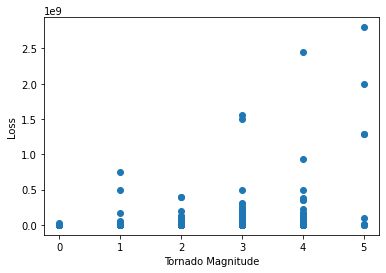

In [ ]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Loss' - positive trend
plt.scatter(df.EF, df.Loss) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Loss') 
plt.show()

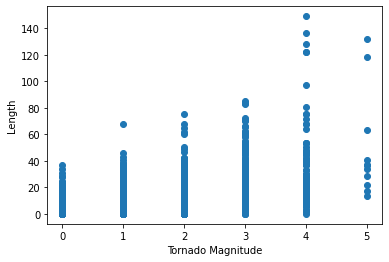

In [ ]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Length' - positive trend
plt.scatter(df.EF, df.Length) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Length') 
plt.show()

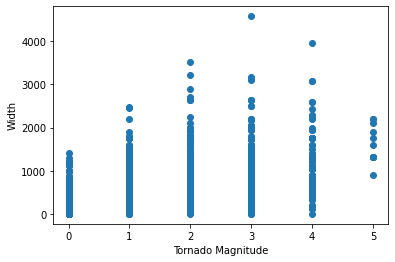

In [ ]:
# Visually inspect relationship between tornado magnitude ('EF' column) and 'Width' - positive trend
plt.scatter(df.EF, df.Width) 
plt.xlabel('Tornado Magnitude') 
plt.ylabel('Width') 
plt.show()

In [ ]:
# Format data to meet the requirements of the Scikit-learn library: 
# Will add Loss later
feature_names = ["Length", "Width"]
X = df[feature_names]


In [ ]:
# Assign the target variable - EF
y = df.EF.values.reshape(-1, 1)
y

array([[0],
       [0],
       [0],
       ...,
       [2],
       [1],
       [0]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
## Logistic Regression

# Our data is not linear - Reject model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression on training 0.6436482631313979
Accuracy of logistic regression on testing 0.6388119808708784
